In [25]:
#Netflix_project

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
data = pd.read_csv('netflix_titles.csv')

In [125]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [126]:
#1. Find the counts of each categorical variable both using graphical and non-graphical analysis.
# Comparison of tv shows vs. movies.

Total Number of Movies: 6131
Total Number of TV Shows: 2676


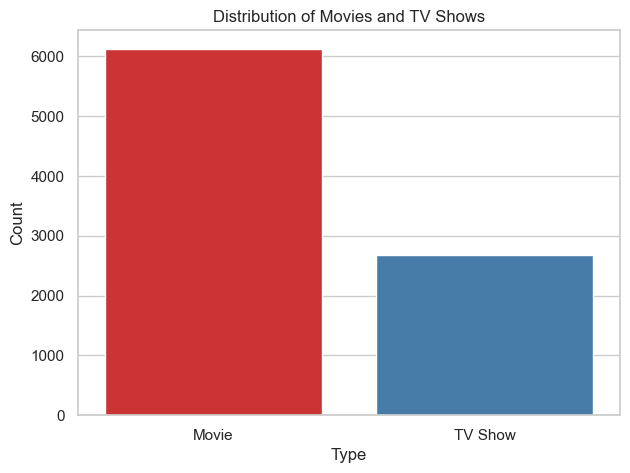

In [127]:
total_movies = data[data['type'] == 'Movie'].shape[0]
total_tv_shows = data[data['type'] == 'TV Show'].shape[0]

print("Total Number of Movies:", total_movies)
print("Total Number of TV Shows:", total_tv_shows)

sns.set(style="whitegrid") 


plt.figure(figsize=(7, 5))  
sns.countplot(data=data, x='type', palette='Set1')  


plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Movies and TV Shows')


plt.show()

In [128]:
genre_distribution = data['listed_in'].str.split(', ').explode().value_counts()
print(genre_distribution)

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

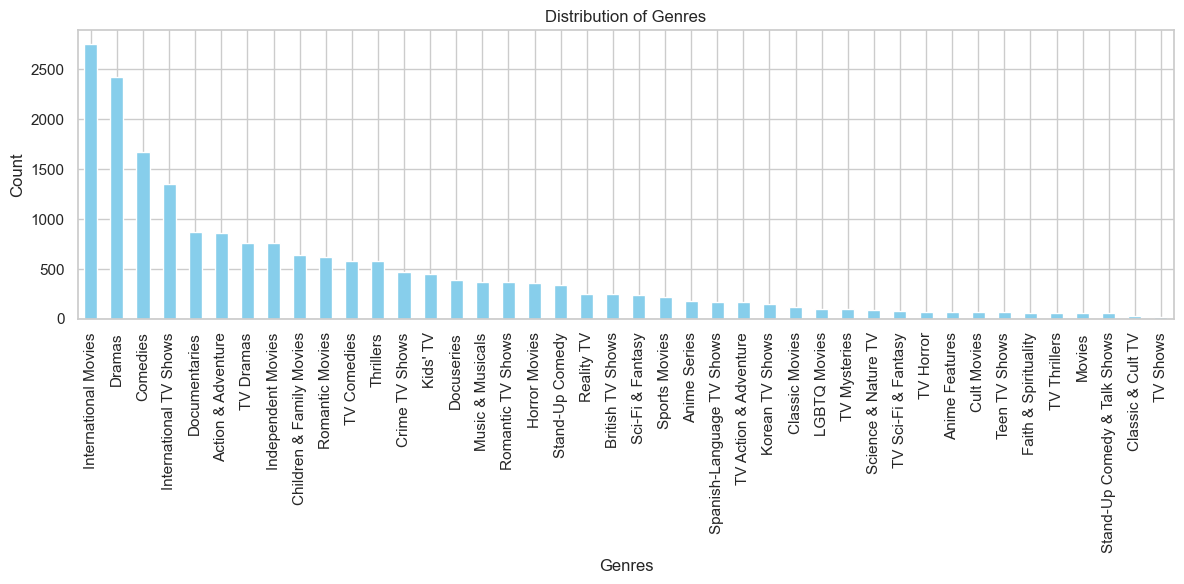

In [129]:
plt.figure(figsize=(12, 6))
genre_distribution.plot(kind='bar', color='skyblue')


plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Genres')


plt.xticks(rotation=90)


plt.tight_layout() 
plt.show()


In [130]:
# Comparison of tv shows vs. movies.

In [131]:
country_distribution = data['country'].str.split(', ').explode().value_counts()
print(country_distribution)

country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: count, Length: 127, dtype: int64


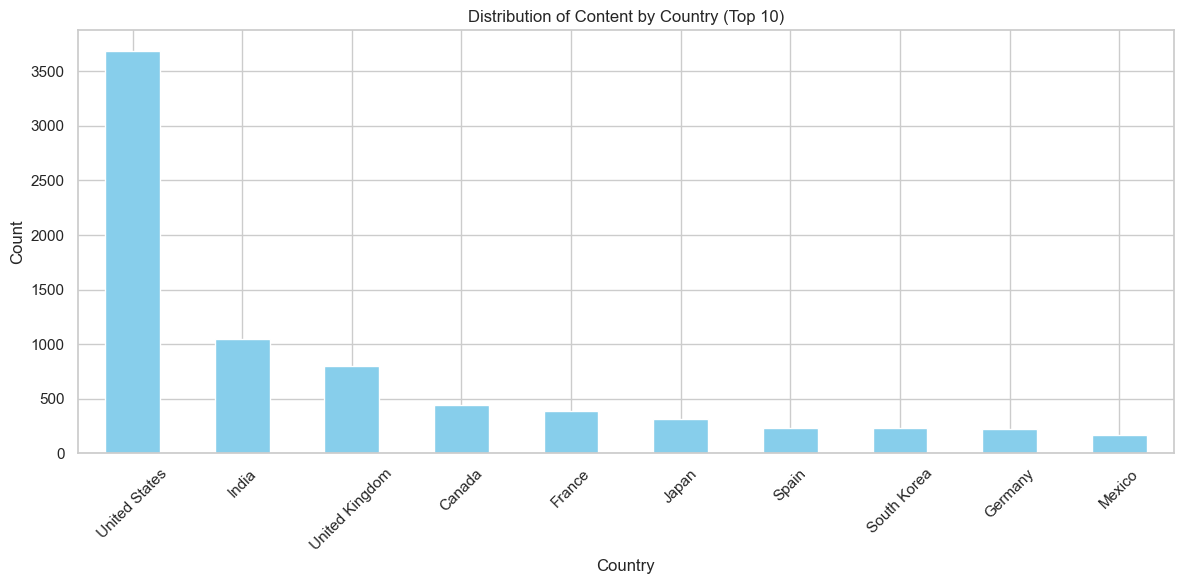

In [132]:
plt.figure(figsize=(12, 6))
country_distribution.head(10).plot(kind='bar', color='skyblue')


plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Content by Country (Top 10)')


plt.xticks(rotation=45)


plt.tight_layout() 
plt.show()


In [133]:
#What is the best time to launch a TV show?
#a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

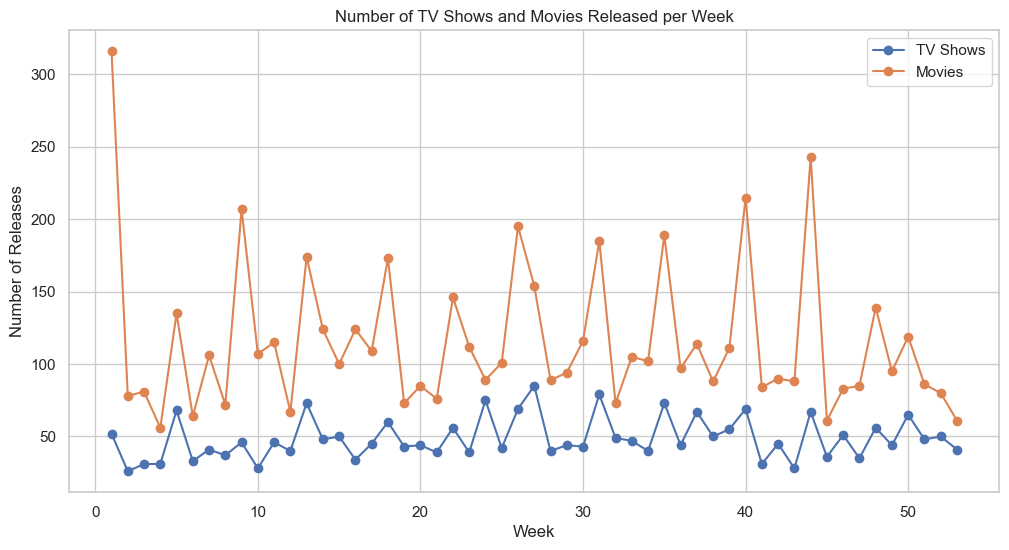

In [134]:
data["Date_added"] = pd.to_datetime(data["date_added"], format="%B %d, %Y", errors='coerce')

data["Week_added"] = data["Date_added"].dt.isocalendar().week

tv_shows = data[data["type"] == "TV Show"]
movies = data[data["type"] == "Movie"]

tv_show_weekly_counts = tv_shows.groupby("Week_added").size()
movie_weekly_counts = movies.groupby("Week_added").size()

plt.figure(figsize=(12, 6))
plt.plot(tv_show_weekly_counts.index, tv_show_weekly_counts.values, label="TV Shows", marker='o')
plt.plot(movie_weekly_counts.index, movie_weekly_counts.values, label="Movies", marker='o')
plt.xlabel("Week")
plt.ylabel("Number of Releases")
plt.title("Number of TV Shows and Movies Released per Week")
plt.legend()
plt.grid(True)
plt.show()

In [135]:
#3b. Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

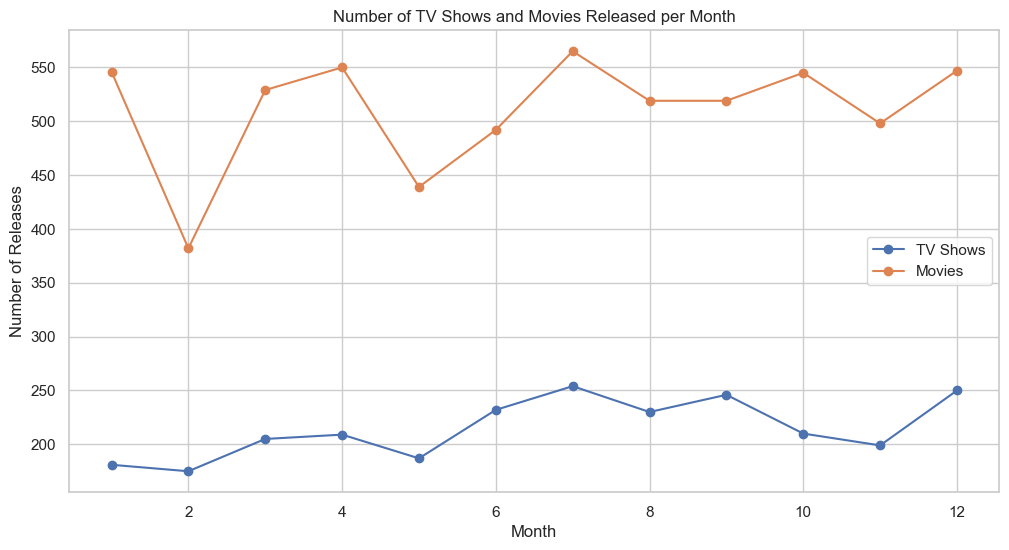

In [136]:
data["Month_added"] = data["Date_added"].dt.month

tv_shows = data[data["type"] == "TV Show"]
movies = data[data["type"] == "Movie"]


tv_show_monthly_counts = tv_shows.groupby("Month_added").size()
movie_monthly_counts = movies.groupby("Month_added").size()

best_tv_show_month = tv_show_monthly_counts.idxmax()
best_movie_month = movie_monthly_counts.idxmax()


plt.figure(figsize=(12, 6))
plt.plot(tv_show_monthly_counts.index, tv_show_monthly_counts.values, label="TV Shows", marker='o')
plt.plot(movie_monthly_counts.index, movie_monthly_counts.values, label="Movies", marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.title("Number of TV Shows and Movies Released per Month")
plt.legend()
plt.grid(True)
plt.show()

In [137]:
tv_shows = data[data["type"] == "TV Show"]
movies = data[data["type"] == "Movie"]

In [138]:
tv_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_added,Week_added,Month_added
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,38,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,38,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,38,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,38,9.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021-09-24,38,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018-05-01,18,5.0
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017-01-17,3,1.0
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018-09-13,37,9.0
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016-12-15,50,12.0


In [139]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_added,Week_added,Month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,38,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,38,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,38,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,38,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,38,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,47,11.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01,27,7.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,44,11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,2,1.0


In [140]:
all_directors = [director for directors in data['director'].dropna() for director in directors]

In [141]:
director_counts = pd.Series(all_directors).value_counts()

# Sort the directors by frequency in descending order
top_directors = director_counts.head(1)

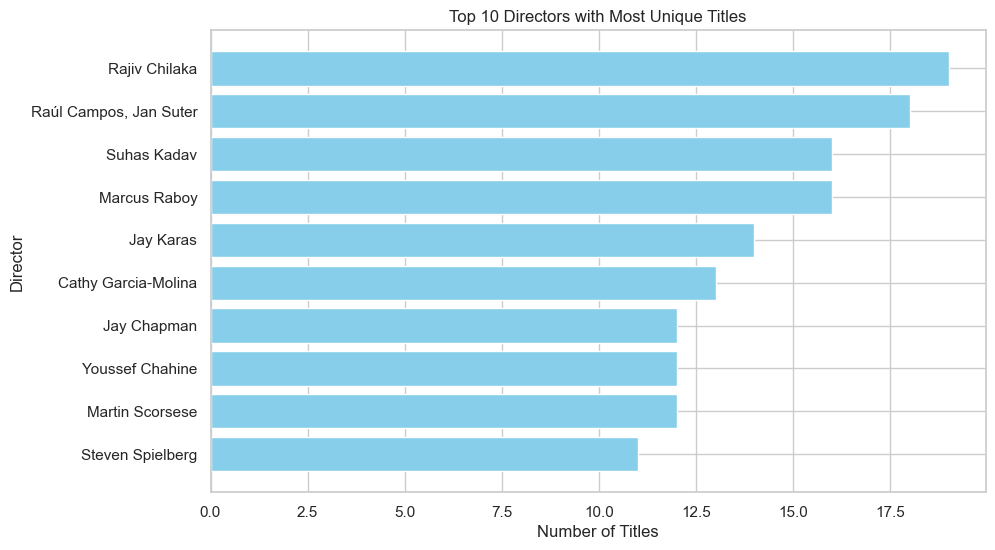

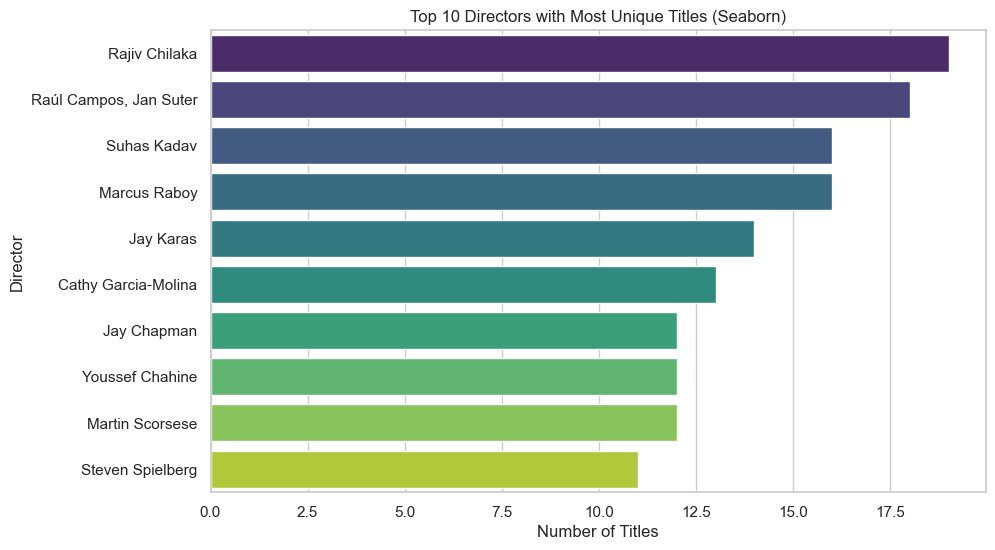

In [142]:

director_counts = data.groupby('director')['title'].nunique().reset_index()

# Sort the directors by the number of titles in descending order
top_directors = director_counts.sort_values(by='title', ascending=False).head(10)

# Create a bar plot using pandas
plt.figure(figsize=(10, 6))
plt.barh(top_directors['director'], top_directors['title'], color='skyblue')
plt.title('Top 10 Directors with Most Unique Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

# Create a similar bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='director', data=top_directors, palette='viridis')
plt.title('Top 10 Directors with Most Unique Titles (Seaborn)')
plt.xlabel('Number of Titles')
plt.ylabel('Director')

# Show the plots
plt.show()


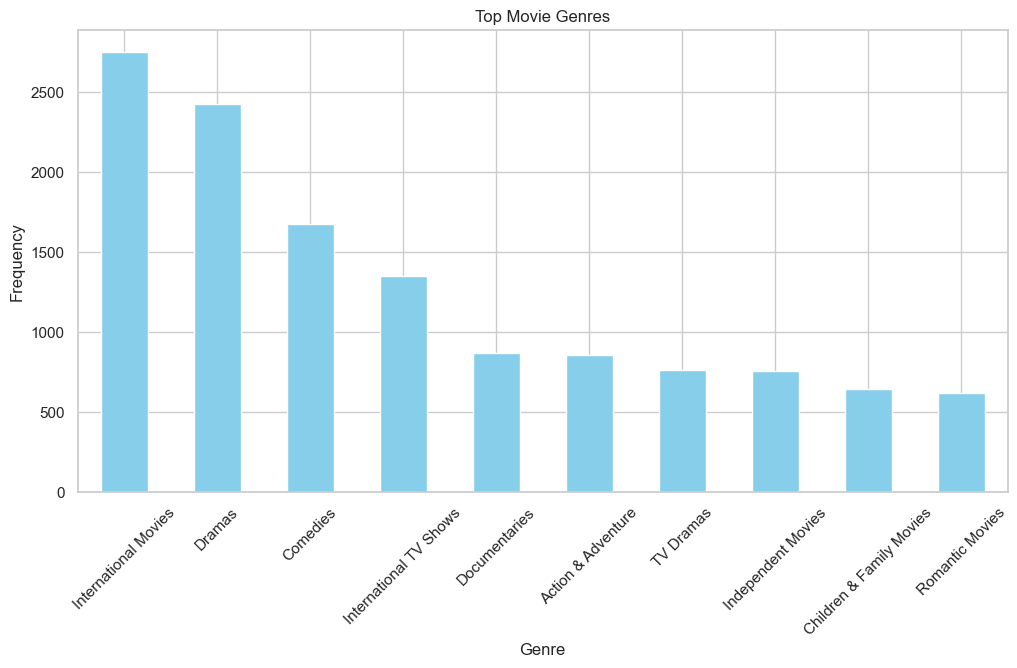

In [143]:
genres_count = data['listed_in'].str.split(', ').explode().value_counts()

# Plot the top N genres (e.g., top 10 genres)
top_n = 10
top_genres = genres_count.head(top_n)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [145]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_added,Week_added,Month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,38,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,38,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,38,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,38,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,38,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,47,11.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01,27,7.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,44,11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,2,1.0


In [1]:
x = int(10.6)

In [2]:
x

10

In [3]:
def compose(f,g):
    #here is your code
    
def increment(x):
    return x+1
def double(x):
    return x*2

composed_function = compose(increment,double)
result = composed_function(5)

IndentationError: expected an indented block after function definition on line 1 (1411864772.py, line 3)

In [4]:
data ='From dallas.ricHard@nyu.as.us Sat Jan 21 09:14:16 2003'
temp = data.find('.')
print data[temp:temp+3]

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (3221166362.py, line 3)

In [6]:
def m(a):
    #code
    
a = [(9,10,3),(10,11,2),(11,12,1),(12,1,5),(1,2,4)]
m = m(a)

IndentationError: expected an indented block after function definition on line 1 (3652632317.py, line 4)

In [7]:
d ={1:1,1:2,2:2,3:3,4:3}
print(d)

{1: 2, 2: 2, 3: 3, 4: 3}


In [8]:
import re

txt = "hello how are you"
x = re.search("hello","txt")
if x:
    print(1)
else :
    print(0)
    

0


In [9]:
num1 = 1
num2 = 0
num3 = -1

try:
    a = num1/num2
    print(a)
except:
    print("Something went wrong")

Something went wrong


In [10]:
class example:
    def_init_(self):
        self_num = 5
    def set_num(self_num):
        self_num = num
    def get_num(self):
        return self_num
    
obj = example()
obj.set_num(6)
#line fill this line

SyntaxError: invalid syntax (755580581.py, line 2)

In [11]:
simple_std_deviation = 0.424
population_std_deviation = 3

# Calculate the sample size (n)
sample_size = (simple_std_deviation / population_std_deviation) ** 2

print(f"The sample size (n) is approximately: {sample_size:.2f}")


The sample size (n) is approximately: 0.02


In [14]:

import math

sample_mean = 15
population_std_deviation = 3
sample_std_deviation = 0.424

# Solve for the sample size (n)
sample_size = ((sample_std_deviation / (population_std_deviation / math.sqrt(sample_size))) ** 2)

print(f"The sample size (n) is approximately: {sample_size:.1f}")


The sample size (n) is approximately: 0.0
